***Depth-First Search (DFS)***

* The DFS algorithm is a recursive algorithm that uses the idea of backtracking. It involves exhaustive searches of all the nodes by going ahead, if possible, else by backtracking.
* Here, the word backtrack means that when you are moving forward and there are no more nodes along the current path, you move backwards on the same path to find nodes to traverse. All the nodes will be visited on the current path till all the unvisited nodes have been traversed after which the next path will be selected.

* Consider a toy problem that can be represented as a following graph. Implement DFS by letting Start nide as A and goal as F.
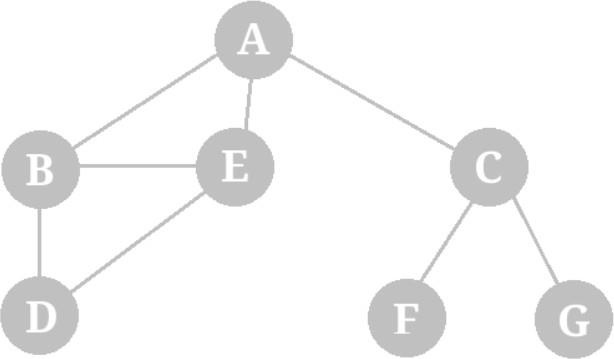

The Node class is used to represent a node in the graph.

In [ ]:
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state      # Stores the name of the node (e.g., 'A', 'B', etc.)
        self.parent = parent    # Stores the parent node (used for backtracking the path)
        self.actions = actions  # Stores the list of neighboring nodes (connected nodes)
        self.totalcost = totalcost  # Not used in this BFS implementation

We can now implement this class in a dictionary. This dictionary will represent our state space graph. As we will traverse through the graph, we will keep updating parent and cost of each node.

In [ ]:
# he key in the dictionary (graph) represents the name (label) of the node.
graph = {'A': Node('A',None, ['B', 'C', 'E'], None),
         'B': Node('B',None, ['A', 'D', 'E'], None),
         'C': Node('C',None, ['A', 'F', 'G'], None),
         'D': Node('D',None, ['B', 'E'], None),
         'E': Node('E',None, ['A', 'B', 'D'], None),
         'F': Node('F',None, ['C'], None),
         'G': Node('G',None, ['C'], None)}

In [ ]:
def actionsequence(graph, initialstate, goalstate):
    solution = [goalstate]  # Start with the goal node
    currentparent = graph[goalstate].parent  # Get the parent of the goal node
    
    # Following stores the parent of each node so we can later reconstruct the path from the goal node to the start node.
    while currentparent is not None:  # Keep going up until we reach the root node
        solution.append(currentparent)
        currentparent = graph[currentparent].parent  # Move to the next parent
    
    solution.reverse()  # Reverse the list to get the path from start to goal
    return solution  # Return the path as a list of node names


In [ ]:
def DFS():
    initialstate = 'A'  # Define the starting node
    goalstate = 'F'     # Define the goal node
    
    # Graph representation using dictionary
    #Initially, all nodes have parent=None because no path has been explored yet.
    graph = {
        'A': Node('A', None, ['B', 'C', 'E'], None),
        'B': Node('B', None, ['A', 'D', 'E'], None),
        'C': Node('C', None, ['A', 'F', 'G'], None),
        'D': Node('D', None, ['B', 'E'], None),
        'E': Node('E', None, ['A', 'B', 'D'], None),
        'F': Node('F', None, ['C'], None),
        'G': Node('G', None, ['C'], None)
    }

    frontier = [initialstate]  # DFS queue (starting with 'A')
    explored = []  # List of visited nodes
    
    while len(frontier) != 0:     # Continue until all nodes are explored
        currentnode = frontier.pop()  # Changed from pop(0) to pop() for DFS (LIFO order)
        print(currentnode)
        explored.append(currentnode)   # Mark node as explored
        currentchildren=0

        #For each neighbor of currentnode:
        #If the neighbor is not in frontier (not in queue).
        #If the neighbor is not in explored (not visited).
        #Set the parent so we can later retrace the path.
        for child in graph[currentnode].actions:   # Loop through neighbors
            if child not in frontier and child not in explored:  # Check if not visited
                graph[child].parent = currentnode    # Set parent for path tracking
                
                if graph[child].state == goalstate:  # Goal reached
                    #print(explored)
                    return actionsequence(graph, initialstate, goalstate)  #return path
                currentchildren=currentchildren+1
                frontier.append(child)  # Add child node to queue for future exploration
        if currentchildren==0:
            del explored[len(explored)-1]

In [ ]:
solution=DFS()
print(solution)

*Activity 1:*
* Imagine going from Arad to Bucharest in the map (given in manual). Implement a DFS to find the corresponding path.
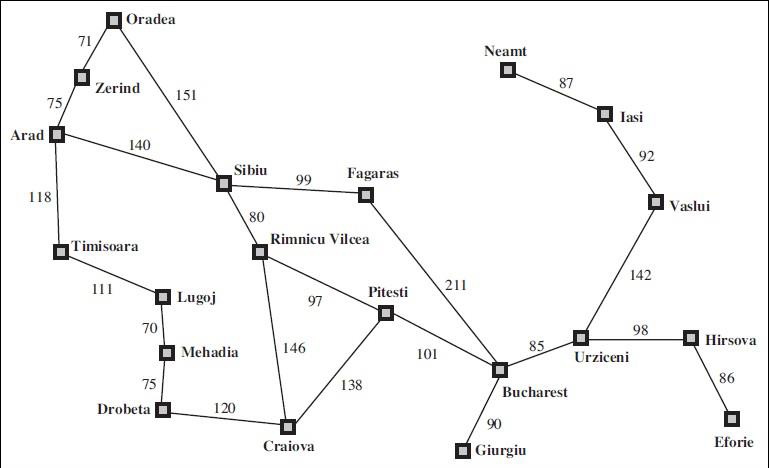

In [ ]:
def DFS():
    initialstate = 'Arad'
    goalstate = 'Bucharest'
    
    # Graph representation of Romania map
    graph = {
        'Arad': Node('Arad', None, ['Zerind', 'Timisoara', 'Sibiu'], None),
        'Zerind': Node('Zerind', None, ['Arad', 'Oradea'], None),
        'Oradea': Node('Oradea', None, ['Zerind', 'Sibiu'], None),
        'Timisoara': Node('Timisoara', None, ['Arad', 'Lugoj'], None),
        'Lugoj': Node('Lugoj', None, ['Timisoara', 'Mehadia'], None),
        'Mehadia': Node('Mehadia', None, ['Lugoj', 'Drobeta'], None),
        'Drobeta': Node('Drobeta', None, ['Mehadia', 'Craiova'], None),
        'Craiova': Node('Craiova', None, ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'], None),
        'Rimnicu Vilcea': Node('Rimnicu Vilcea', None, ['Sibiu', 'Craiova', 'Pitesti'], None),
        'Sibiu': Node('Sibiu', None, ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'], None),
        'Fagaras': Node('Fagaras', None, ['Sibiu', 'Bucharest'], None),
        'Pitesti': Node('Pitesti', None, ['Rimnicu Vilcea', 'Craiova', 'Bucharest'], None),
        'Bucharest': Node('Bucharest', None, ['Fagaras', 'Pitesti', 'Urziceni', 'Giurgiu'], None),
        'Giurgiu': Node('Giurgiu', None, ['Bucharest'], None),
        'Urziceni': Node('Urziceni', None, ['Bucharest', 'Vaslui', 'Hirsova'], None),
        'Vaslui': Node('Vaslui', None, ['Urziceni', 'Iasi'], None),
        'Iasi': Node('Iasi', None, ['Vaslui', 'Neamt'], None),
        'Neamt': Node('Neamt', None, ['Iasi'], None),
        'Hirsova': Node('Hirsova', None, ['Urziceni', 'Eforie'], None),
        'Eforie': Node('Eforie', None, ['Hirsova'], None)
    }

    frontier = [initialstate]  # Queue to process nodes (FIFO for BFS)
    explored = []  # List of visited nodes
    
    while frontier:
        currentnode = frontier.pop()  # Changed from pop(0) to pop() for DFS (LIFO order)
        explored.append(currentnode)  # Mark as explored
        
        # Loop through the neighbors of the current node
        for child in graph[currentnode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentnode  # Set parent for path tracking
                if graph[child].state == goalstate:
                    return actionsequence(graph, initialstate, goalstate)
                frontier.append(child)  # Add to frontier for BFS exploration

solution = DFS()
print("Path from Arad to Bucharest using DFS:", solution)

*Task 2:*
* Generate a list of possible words from a character matrix
Given an M × N boggle board, find a list of all possible words that can be formed by a sequence of adjacent characters on the board.
We are allowed to search a word in all eight possible directions, i.e., North, West, South, East, North-East, North-West, South-East, South-West, but a word should not have multiple instances of the same cell.
Consider the following the traditional 4 × 4 boggle board. If the input dictionary is [START, NOTE, SAND, STONED], the valid words are [NOTE, SAND, STONED].

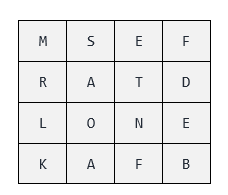

In [ ]:
# Class definition for a Node
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state  # Represents the position (row, col) of a letter on the board
        self.parent = parent  # Stores the parent node to track the path of traversal
        self.actions = actions  # Not used in this case, but could store possible moves
        self.totalcost = totalcost  # Not used in this problem but kept for structure

# Function to find words in a Boggle board using DFS
def DFS(board, dictionary):
    # Define all 8 possible movement directions (N, S, E, W, NE, NW, SE, SW)
    directions = [(-1, -1), (-1, 0), (-1, 1),  # North-West, North, North-East
                  (0, -1),          (0, 1),   # West,       East
                  (1, -1),  (1, 0), (1, 1)]   # South-West, South, South-East

    rows = len(board)  # Number of rows in the board
    cols = len(board[0])  # Number of columns in the board
    valid_words = set()  # Set to store valid words found in the dictionary

    # Helper function to perform DFS from a given cell
    def dfs_helper(node, current_word, visited):
        # Add the character at the current cell to the word being formed
        current_word += board[node.state[0]][node.state[1]]
        visited.add(node.state)  # Mark this cell as visited

        # If the formed word exists in the dictionary, store it
        if current_word in dictionary:
            valid_words.add(current_word)

        # Explore all 8 possible directions recursively
        for direction in directions:
            new_row = node.state[0] + direction[0]  # Calculate new row index
            new_col = node.state[1] + direction[1]  # Calculate new column index

            # Check if the new position is within the board and not visited yet
            if 0 <= new_row < rows and 0 <= new_col < cols and (new_row, new_col) not in visited:
                new_node = Node((new_row, new_col), node, [], None)  # Create a new node
                dfs_helper(new_node, current_word, visited.copy())  # Recursive DFS call

    # Iterate through each cell in the board as a starting point for DFS
    for i in range(rows):
        for j in range(cols):
            start_node = Node((i, j), None, [], None)  # Create a starting node
            dfs_helper(start_node, "", set())  # Start DFS from this position

    return list(valid_words)  # Return the found words as a list


# Define the Boggle board
board = [
    ['S', 'T', 'N', 'G'],
    ['O', 'A', 'E', 'S'],
    ['D', 'N', 'O', 'T'],
    ['S', 'E', 'D', 'M']
]

# Define the dictionary containing valid words
dictionary = ["START", "NOTE", "SAND", "STONED"]

# Find all valid words from the board
valid_words = DFS(board, dictionary)
print("Valid words:", valid_words)  # Output the found words
